In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from datetime import datetime
import numpy as np
import math
from plotly.graph_objs.scatter.marker import Line
from plotly.subplots import make_subplots
import plotly.express as px

In [2]:
data = pd.read_excel('5years_database.xlsx', sheet_name='Data with Vix')
data

,Date,Sp-close,Volume,Vix-close
0,02/22/2023,3991.05,4079320000,22.29
1,02/21/2023,3997.34,4121590000,22.87
2,02/17/2023,4079.09,4045480000,20.02
3,02/16/2023,4090.41,4143660000,20.17
4,02/15/2023,4147.60,4075980000,18.23
...,...,...,...,...
1163,07/09/2018,2784.17,3070060000,12.69
1164,07/06/2018,2759.82,2590250000,13.37
1165,07/05/2018,2736.61,2980160000,14.97
1166,07/03/2018,2713.22,1911460000,16.14


In [3]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y') # convert 'Date' column to datetime
#data.set_index('Date', inplace=True)  # Set the 'Date' column as the index

In [4]:
trading_instrument = 'Sp-close'
fig = px.line(data, x='Date', y='Sp-close', title=f'{trading_instrument} Time Series')
fig.show()

In [6]:
# Normalize the Close column using min-max scaling
scaler = MinMaxScaler()    #x' = (x - min) / (max - min) Normalization
normalized_columns = ["Norm_Volume", "Norm_Vix_close", "Norm_Sp_close"]
data.dropna(inplace=True)
data[normalized_columns] = scaler.fit_transform(data[["Volume", "Vix-close", "Sp-close"]])
data

,Date,Sp-close,Volume,Vix-close,Norm_Volume,Norm_Vix_close,Norm_Sp_close
0,2023-02-22,3991.05,4079320000,22.29,0.320598,0.159243,0.685244
1,2023-02-21,3997.34,4121590000,22.87,0.325468,0.167316,0.687702
2,2023-02-17,4079.09,4045480000,20.02,0.316700,0.127645,0.719646
3,2023-02-16,4090.41,4143660000,20.17,0.328011,0.129733,0.724070
4,2023-02-15,4147.60,4075980000,18.23,0.320214,0.102728,0.746417
...,...,...,...,...,...,...,...
1163,2018-07-09,2784.17,3070060000,12.69,0.204324,0.025612,0.213652
1164,2018-07-06,2759.82,2590250000,13.37,0.149046,0.035078,0.204137
1165,2018-07-05,2736.61,2980160000,14.97,0.193967,0.057350,0.195068
1166,2018-07-03,2713.22,1911460000,16.14,0.070845,0.073636,0.185928


In [7]:
kmeans = KMeans(n_clusters=2, random_state=7)
data['kmeans_3'] = kmeans.fit_predict(data[normalized_columns])
data.head(5)

,Date,Sp-close,Volume,Vix-close,Norm_Volume,Norm_Vix_close,Norm_Sp_close,kmeans_3
0,2023-02-22,3991.05,4079320000,22.29,0.320598,0.159243,0.685244,0
1,2023-02-21,3997.34,4121590000,22.87,0.325468,0.167316,0.687702,0
2,2023-02-17,4079.09,4045480000,20.02,0.316700,0.127645,0.719646,0
3,2023-02-16,4090.41,4143660000,20.17,0.328011,0.129733,0.724070,0
4,2023-02-15,4147.60,4075980000,18.23,0.320214,0.102728,0.746417,0


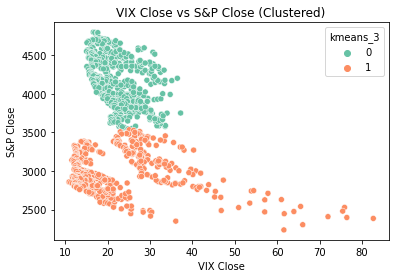

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=data['Vix-close'], y=data['Sp-close'], hue=data['kmeans_3'], palette='Set2')
plt.xlabel('VIX Close')
plt.ylabel('S&P Close')
plt.title('VIX Close vs S&P Close (Clustered)')
plt.show()

In [8]:
#Calculate the mean values of each feature within each cluster
centroids = data.groupby('kmeans_3').mean()
print(centroids)

            Sp-close        Volume  Vix-close  Norm_Volume  Norm_Vix_close  \
kmeans_3                                                                     
0         4141.15087  4.505837e+09  22.485235     0.369736        0.161960   
1         2966.48602  4.076608e+09  21.164688     0.320286        0.143579   

          Norm_Sp_close  
kmeans_3                 
0              0.743897  
1              0.284893  


In [9]:
# Calculate returns
data['Sp-returns'] = data['Sp-close'].pct_change()
data.dropna(inplace=True)

In [10]:
cluster_stats = data.groupby('kmeans_3')['Sp-returns'].agg(['mean', 'count'])
cluster_stats['positive_returns'] = (data[data['Sp-returns'] > 0]
                                     .groupby('kmeans_3')['Sp-returns'].count())
cluster_stats['negative_returns'] = (data[data['Sp-returns'] < 0]
                                     .groupby('kmeans_3')['Sp-returns'].count())
print(cluster_stats)

              mean  count  positive_returns  negative_returns
kmeans_3                                                     
0        -0.000070    574               287               287
1        -0.000379    593               257               336


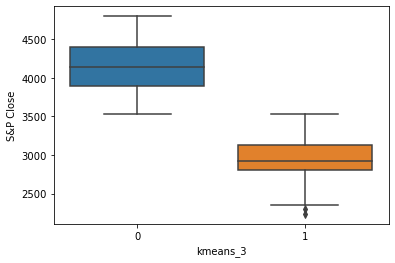

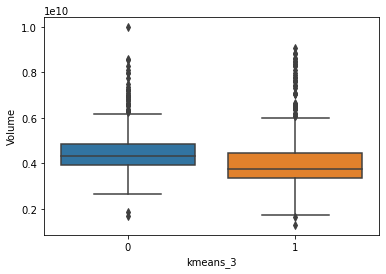

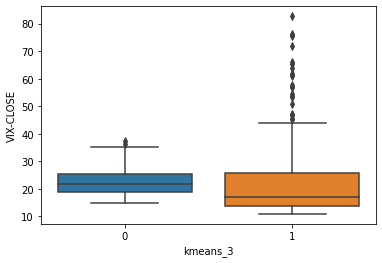

In [11]:
sns.boxplot(x='kmeans_3', y='Sp-close', data=data)
plt.ylabel('S&P Close')
plt.show()

sns.boxplot(x='kmeans_3', y='Volume', data=data)
plt.ylabel('Volume')
plt.show()

sns.boxplot(x='kmeans_3', y='Vix-close', data=data)
plt.ylabel('VIX-CLOSE')
plt.show()

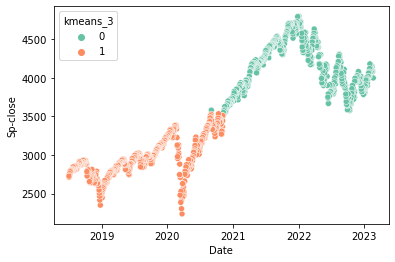

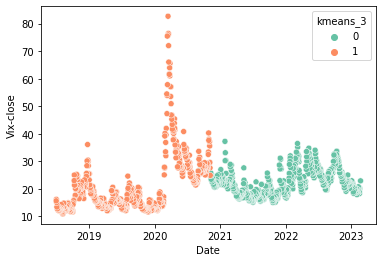

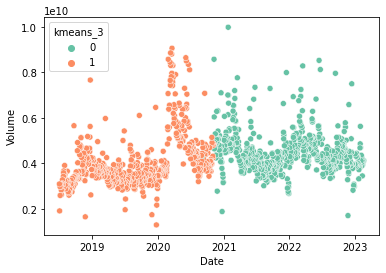

In [12]:
#S&P close
sns.scatterplot(x=data['Date'], y=data['Sp-close'], hue=data['kmeans_3'], palette='Set2')
plt.show()

#VIX Index
sns.scatterplot(x=data['Date'], y=data['Vix-close'], hue=data['kmeans_3'], palette='Set2')
plt.show()

#s&p volume
sns.scatterplot(x=data['Date'], y=data['Volume'], hue=data['kmeans_3'], palette='Set2')
plt.show()